<h5> Problem set 1 </h5>
50 points total <br> Due April 24th 

The goals of this problem set are to familiarize you with some classical mathematical population models. For assessment, you are required to submit two files:

a) A document with your mathematical solutions. This file can be handwritten and uploaded to Canvas as a scanned / photographed pdf or image file. It can also be typeset in ms word (using the 'Equation' feature for the maths) or using $\LaTeX$ (see [here](https://www.overleaf.com/learn/latex/Free_online_introduction_to_LaTeX_(part_1)) for more information).
    
b) A .py file with your code. Below I give more specific instructions for how to set this up and what to include.

<ins>Question 1 </ins> (worth 15 points in total)

<ins>Question 1a</ins> (5 points)

Consider the Malthusian growth model:

\begin{equation}
\frac{dP}{dt} = \mu P
\end{equation}

with initial condition such that at time $t=0$, $P=P_0$. That is: $P(0)=P_0$.

Use separation of variables to solve this problem (tip: watch the example I provide in lecture 1. Then, using pen and paper, try and work through the steps on your own, but refer back to the lecture if you get stuck)

<ins>Question 1b</ins> (5 points)

Now visualize the solution to this model using Python. First, we need to import some python packages:

- the numpy ('numerical python') package for our numerical calculations. See [here](https://numpy.org) for documentation.
- the pylab ('python plotting') package to visualize our output. This is part of the matplotlib library, see [here](https://matplotlib.org) for documentation.
- the pandas ('panel data') library for data manipulation. See [here](https://pandas.pydata.org/docs/) for documentation.

In [2]:
import numpy as np
import pylab as pl
import pandas as pd

print('your test string')

your test string


You can test that the code is working by first clicking anywhere in the cell with the code, then hitting the 'Run' icon on the toolbar above. You should see the words 'your test string' appear directly below the code and above this text.

Now that the code is working in this jupyter notebook, we can transfer it over to a .py file. Using your preferred text editor, open up a file, e.g. with the following name: 'David_Talmy_pset1.py' replacing my name with your own. This is the file you will eventually submit for grading. Copy the text above into the .py file. Before saving it, replace 'your test string' with something new, e.g. 'script test string'. Once saved, from the command line, type:

python David_Talmy_pset1.py

replacing the filename with whatever name you have chosen. Your test string should appear on the screen. This means you have imported the packages into your workspace. 

(As a note, I have found this workflow helpful with all code that I write: first play around with the code in jupyter, then copy over to a .py script. This lets you test out snipets of code before building a long file with lots of potential bugs.)

In order to visualize the solution to the Malthusian growth model, we first need to setup a time domain. You can do this by running the code below

In [3]:
tmin,tmax = 0,15
delta = 0.01
nsteps = (tmax-tmin)/delta
times = np.linspace(tmin,tmax,int(nsteps))
print('tmin =',tmin)
print('tmax =',tmax)
print('nsteps =', nsteps)

tmin = 0
tmax = 15
nsteps = 1500.0


Be sure to hit the 'Run' button above to make sure this code works. You now have an array of numbers stored in the 'times' variable, that goes between 0 and 10 days in 1000 even increments. 

Now that the time domain is setup, we can calculate the solution over this domain. If we choose an intial condition (say, $P_0=10000$ cells ml$^{-1}$), and a growth rate (say, $\mu$=1.0 day$^{-1}$) we can store our solution in the variable P:

In [4]:
P0 = 10000 # initial condition
mu = 1 # growth rate
Panalytical = P0*np.exp(mu*times)

Now that you have done this, let's visualize the solution to the Malthusian growth model. You can do this by first setting up a set of axes. Run the code below, then add it to your .py script.

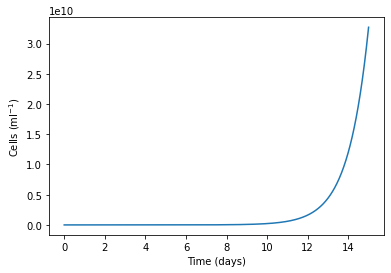

In [5]:
f,ax=pl.subplots()
ax.set_xlabel('Time (days)')
ax.set_ylabel('Cells (ml$^{-1}$)')
ax.plot(times,Panalytical,label='Analytical solution')
pl.show()

<ins>Question 1c</ins> (5 points)

Now solve the Malthusian growth model using numerical integration. Here, we will use Euler integration (Wikipedia has a good explanation, [here](https://en.wikipedia.org/wiki/Euler_method))

In [6]:
Pnumerical = np.r_[[]]
Pt = P0
for t in times:
    Pt = Pt + delta*mu*Pt
    Pnumerical = np.append(Pnumerical,Pt)

The array 'Ptnumerical' now has the numerical solution. Let's visualize it and compare with the analytical solution:

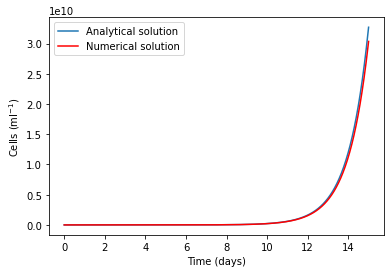

In [7]:
f,ax1=pl.subplots()
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Cells (ml$^{-1}$)')
ax1.plot(times,Panalytical,label='Analytical solution')
ax1.plot(times,Pnumerical,c='r',label='Numerical solution')
l = ax1.legend()
pl.show()

<ins>Question 2</ins> (worth 15 points total)

The Malthusian growth model is unrealistic, as it allows populations to grow exponentially forever. We will now consider an extension to the Malthusian growth model, the logistic equation.

Consider a simple resource ($R$, cellular units $ml^{-1}$) fed upon by a 'producer' ($P$, cellular units $ml^{-1}$):

\begin{align}
\frac{dR}{dt}&=-\alpha R P \\
\frac{dP}{dt}&=\alpha R P \\
\end{align}

where $\alpha$ is a nutrient affinity with units ml day$^{-1}$. Let the system have initial conditions $R(0)=R_0$ and $P(0)=P_0$. Furthermore, assume that the total amount of material in the system is conserved, such that $R+P=K$, where K is a carrying capacity with cellular units ($ml^{-1}$). Using pen and paper, rearrange these equations above so that they resemble the logistic equation:

\begin{equation}
\frac{dP}{dt} = \mu P \left( 1-\frac{P}{K}\right)
\end{equation}

Where $\mu$ is a new parameter that can be expressed as function of the parameters $\alpha$ and $K$.

(Tip: try and work on your own, without help. If you get stuck, refer to my video lecture, or look in the Appendix of the paper by Ram et al., 'Predicting microbial growth in a mixed culture from growth curve data' PNAS 2019)

<ins>Question 3</ins> (worth 20 points total)

<ins>Question 3a</ins> (5 points)

Now that you have derived the logistic equation, we can use a combination of analytical and numerical techniques to solve it, and compare with laboratory data. First, let's load in and vizualize some data of <i>Prochlorococcus</i> growing in batch culture:

In [8]:
pro_df = pd.read_csv('../data/pro_batch_curve.csv')
print(pro_df)

   time     cells
0     0    2410.0
1     3    5390.0
2     5   15800.0
3    10   52300.0
4    12  135000.0
5    14  120000.0


This experimental data shows cells densities over 18 days. We can vizualize the data and compare it with the logistic equation  (note that, for comparison below, I also provide an analytical solution to the logistic equation, an explanation of this can be found, e.g. [here](https://www.youtube.com/watch?v=vsYWMEmNmZo)):

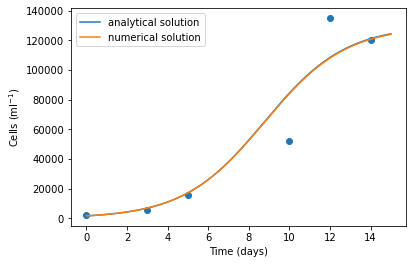

In [11]:
# set up axes
f2,ax2 = pl.subplots()
ax2.scatter(pro_df['time'],pro_df['cells'])
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Cells (ml$^{-1}$)')

# define parameter values
P0 = pro_df['cells'][0] / 1.5
K = 130000
alpha = 1/260000.0
mu = K*alpha

# solve model analytically
Plogistic_analytical = K*P0*np.exp(mu*times) / (K+P0*(np.exp(mu*times)-1))

# solve model numerically
Nlogistic_numerical = np.r_[[]]
Plogistic_numerical = np.r_[[]]
Pt = P0
N0 = K-P0
Nt = N0
for t in times:
    Nt = Nt - delta*alpha*Nt*Pt
    Pt = Pt + delta*alpha*Nt*Pt
    Nlogistic_numerical = np.append(Nlogistic_numerical,Nt)
    Plogistic_numerical = np.append(Plogistic_numerical,Pt)

# now plot
ax2.plot(times,Plogistic_analytical,label='analytical solution')
ax2.plot(times,Plogistic_numerical,label='numerical solution')
l = ax2.legend()
pl.show()

<ins>Question 3b</ins> (15 points)

The analytical and numerical solutions should be so close to one another that they overlap. Now that we have these solutions working, let's finish up by exploring:

i) what happens when we change the timestep (delta)? (5 points) <br>
ii) what happens when we change the carrying capacity, $K$? (5 points) <br>
iii) what happens when we change the nutrient affinity, $\alpha$? (5 points)

conduct simulations where you double each of these (timestep, carrying capacity, and nutrient affinity). Plot the results (Tip: create a brand new Python figure for each sensitivity test).